<h1><center>Data Science with Python -  Course 1<center></h1>
# <center>Dr. Tran Vu Khanh <center>
# <center> Statistical and Data techniques in Data Science <center>

# <center>======================================<cent>

### Statistical analysis is at the core of data science. Using statistics, you can learn about the <font color=red> distribution of the data</font>, how much of <font color=red> variance there is between values</font>, and how values for <font color=red>  one feature of the data to influence other values</font>. 

# <center>======================================<cent>

# <center> 0. Statistics<center>

## Science of data collection, summarization, analysis and interpretation

## Descriptive versus Inferential Statistics: 
  - Descriptive Statistics: Data description (summarization) such as center, variability and shape.
  - Inferential Statistics: Drawing conclusion beyond the sample studied, allowing for prediction.

# <center>======================================<cent>

# <center>1. Descriptive Statistics of Data<center>

## Statistics describes a numeric set of data by its
* Center (mean, median, mode etc)
* Variability (standard deviation, range etc)
* Shape (skewness, kurtosis etc)

## Statistics describes a categorical set of data by 
* Frequency, percentage or proportion of each category

# <center>======================================<cent>

# 1.1 Data sample 

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd

# Load data sample 
data = pd.read_csv("Iris_Data.csv")
data.head()

sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

In [2]:
# Number of rows
print(data.shape[0])

150


In [3]:
# Column names
print(data.columns.tolist())

['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']


In [4]:
# Data types
print(data.dtypes)

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object


In [4]:
# The str method maps the following function to each entry as a string
data['species'] = data.species.str.replace('Iris-', '')
# alternatively
# data['species'] = data.species.apply(lambda r: r.replace('Iris-', ''))

data.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

In [5]:
# One way to count each species
data.species.value_counts()

versicolor    50
setosa        50
virginica     50
Name: species, dtype: int64

In [6]:
len(data['sepal_length'])

150

In [7]:
# Display a description of the dataset
display(data.describe())

sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

In [8]:
data.describe().loc['mean']

sepal_length    5.843333
sepal_width     3.054000
petal_length    3.758667
petal_width     1.198667
Name: mean, dtype: float64

In [9]:
data.describe().loc['max']

sepal_length    7.9
sepal_width     4.4
petal_length    6.9
petal_width     2.5
Name: max, dtype: float64

# <center>======================================<cent>

<h1><center>Central Tendencies</center></h1>
<h3><center>Notation of wehre our data is centered<center></h3>
# Means:
## Most commonly we’ll use the mean (or average), which is just the sum of the data divided by its count.

### Population Mean Formula: 

$$\mu=\frac{1}{N}\sum_{j=1}^Nx_j$$

### Sample Mean Formula: 

$$\bar x=\frac{1}{n}\sum_{j=1}^nx_j$$

In [10]:
# this isn't right if you don't from __future__ import division
def Mean(x):
    return sum(x)/len(x)

# E.g. 1, 
x=[12, 13, 14, 15, 20 ,70, 60, 11]
print(Mean(x))
# E.g. 2,
print(Mean(data['sepal_length']))

26.875
5.843333333333335


## Function 'mean' in libraries

In [11]:
# Function 'mean' in library 'statistics'
import statistics as sta
sta.mean(data['sepal_length'])

5.843333333333334

In [12]:
import numpy as np
np.mean(data['sepal_length'])

5.843333333333335

# <center>======================================<cent>

# Median 

# Median is the middle-most value (if the number of data points is odd) or the average of the two middle-most values (if the number of data points is even).


# Example: 
 - For example, consider the list of numbers

   $$ 1,~ 3,~ 3,~ 6, ~7, ~8, ~9$$

This list contains seven numbers. The median is the fourth of them, which is 6.
 
 - If there is an even number of observations, then there is no single middle value; the median is then usually defined to be the mean of the two middle values. For example, in the data set

    1, 2, 3, 4, 5, 6, 8, 9

the median is the mean of the middle two numbers: this is (4 + 5)/2=4.5, which is 4.5

In [13]:
# this isn't right if you don't from __future__ import division

def Median(v):
    n = len(v)
    sorted_v = sorted(v)
    midpoint = n//2
    if n % 2 == 1:
# if odd, return the middle value
        return sorted_v[midpoint]
    else:
# if even, return the average of the middle values
        lo = midpoint - 1 
        hi = midpoint
        return (sorted_v[lo] + sorted_v[hi]) / 2
    
    
#========
    
#Example 1
x=[1, 3, 3, 6, 7, 8, 9]
print(Median(x))
y=[1, 2, 3, 4, 5, 6, 8, 9]
print(Median(y))

#Example 2
print(Median(data['sepal_length']))

6
4.5
5.8


## Funciton 'median' in  libraries 

In [14]:
# Funciton 'median' in statistics library 
print(sta.median(data['sepal_length']))

5.8


In [15]:
# Funciton 'median' in statistics library 
print(np.median(data['sepal_length']))

5.8


# <center>======================================<cent>

# Quantiles

### In statistics, quantiles are cut points dividing the range of a probability distribution into continuous intervals.

### Example 
![image.png](attachment:image.png)

In [16]:
def Quantile(x, p):
    p_index = int(p * len(x))
    return sorted(x)[p_index]

print("Q1=", Quantile(data['sepal_length'], 0.25))
print("Q2=", Quantile(data['sepal_length'], 0.5))
print("Q3=", Quantile(data['sepal_length'], 0.75))

Q1= 5.1
Q2= 5.8
Q3= 6.4


In [17]:
x=[3, 6, 7, 8, 8, 10, 13, 15, 16]
print("Q1=", Quantile(x, 0.25))
print("Q2=", Quantile(x, 0.5))
print("Q3=", Quantile(x, 0.75))

Q1= 7
Q2= 8
Q3= 13


# Percentile

In [18]:
print(np.percentile(data['sepal_length'], 25))
print(np.percentile(data['sepal_length'], 50))
print(np.percentile(data['sepal_length'], 75))

5.1
5.8
6.4


# Defintion of quartiles 
### Zeroth quartile =min 
### First quartile=percentile(X, 25)=Q1
### Second quartile=median          =Q2
### Third quartile=percentile(X,75) =Q3
### Fourth quartile=max
### The inter-quartile range (IQR) is the difference between the first and third quartiles, i.e. IQR = Q3- Q1 

# <center>======================================<cent>

# Mode 

### The mode is the most commonly occurring value
### Exampe: mode([1,2,1,3,4,5,5])=[1.5]

## Funciton 'mode' in 'statistics' lib

In [19]:
print(sta.mode([1,2,1,2,4,5,4,4]))
print(sta.mode(data['sepal_length']))

4
5.0


# <center>======================================<cent>

<h1><center> Dispersion</center></h1>
<h3><center> Dispersion refers to measures of how spread out our data is <center><h3>

# Range = max-min  
### (or  sometimes Range =[min, max])

In [20]:
# Range=max-min,"range" already means something in Python, so we'll use a different name
def Range(x):
    return max(x)-min(x)

Range(data['sepal_length'])

3.6000000000000005

# <center>======================================<cent>

# Variance and Standard deviation (std)

### The variance measures the dispresion of the data from the mean
### Population Variance Formula 
$$variance:\quad \sigma^2=\frac{1}{N}\sum_{j=1}^N(x_j-\mu)^2$$
### Sample Variance Formula 
$$variance: \quad s^2=\frac{1}{n-1}\sum_{j=1}^n(x_j-\bar x)^2$$
### Formula of standard deviation 
$$std=\sqrt{variance}$$

In [22]:
def Variance(x):
    n = len(x)
    return sum((x_i-Mean(x))**2 for x_i in x) / (n - 1)

import math
def StD(x):
    return math.sqrt(Variance(x))

print(Variance(data['sepal_length']))
print(StD(data['sepal_length']))

0.6856935123042505
0.8280661279778629


## Funcitons 'variance' and 'stded' in 'statistics' library

In [23]:
print(sta.variance(data['sepal_length']))   # Sample variance
print(sta.stdev(data['sepal_length']) )     # Sample std
print(sta.pvariance(data['sepal_length']))  #Population variance
print(sta.pstdev(data['sepal_length']))     # Population std

0.6856935123042506
0.8280661279778629
0.6811222222222223
0.8253012917851409


# <center>======================================<cent>

# Skewness 

### How asymmetric data is spread around the mean. If it is positive, the distribution is right skewed; if negative, the distribution is left skewed. A normal ditribution has a skew of 0. 
### Population Skewness Formula : 
$$skewness=\frac{1}{N}\frac{\sum_{j=1}^N(x_j-\mu)^3}{\sigma^3}$$
### Sample Skewness Formula : 
$$skewness=\frac{n}{(n-1)(n-2)}\frac{\sum_{j=1}^n(x_j-\bar x)^3}{s^3}$$


In [24]:
import scipy.stats as ss 
ss.skew(data['sepal_length'])

0.3117530585022963

# Kurtosis 
### Kurtosis is a measure of peakedness.  The higher the kurtosis measure is, the more outliers are present and the longer the tails of the distribution in the histogram are. 
### Polulation Kurtosis Formula: 
$$kurtosis=\frac{1}{N}\frac{\sum_{j=1}^N(x_j-\mu)^4}{\sigma^4}$$
### Sample Kurtosis Formula: 
$$kurtosis=\frac{n(n+1)}{(n-1)(n-2)(n-3)}\frac{\sum_{j=1}^n(x_j-\bar x)^4}{s^4}$$
### Note: excess kurtosis =(simple) kurtosis -3

In [25]:
ss.kurtosis(data['sepal_length'])  # excess kurtosis=k-3

-0.5735679489249765

<h1><center> Corellation </center></h1>
<h3><center>(A correlation is a statistic intended to quantify the strength of the relationship between two variables.)</center></h3>

# Covariance
### Covariance is a measure of the tendency of two variables to vary together.
### Population Covarian Formula: 
$$covaviance (X,Y)= \frac{1}{N}\sum_{j=1}^N(x_j-\mu(X))(y_j-\mu(Y))$$
### Sample Covarian Formula: 
$$covariance(X,Y)= \frac{1}{n-1}\sum_{j=1}^n(x_j-\bar x)(y_j-\bar y)$$

In [26]:
import numpy as np
def Cov(xs, ys, meanx=None, meany=None):
    xs = np.asarray(xs)
    ys = np.asarray(ys)
 
    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)
    cov = np.dot(xs-meanx, ys-meany) / (len(xs)-1)
    return cov

Cov(data['sepal_length'],data['sepal_width'])
#Cov([100,2000,4000],[0.2,0.4,0])

-0.03926845637583892

In [27]:
z=np.cov(data['sepal_length'],data['sepal_width'])

In [28]:
z[0][1]

-0.03926845637583892

### Note: This numbe can be hard to interpret, for a couple of reasons: 
* Its units are product of the input's units, which can be hard to make sense of, e.g. kilogram-meters. 
* Covarince can be large or small might depend only one variable.

### One solution of these problems are to divide the deviation by std.

# Correlation 
### Formula 
$$\rho=\frac{\text{covariance}(X,Y)}{\text{standard_deviation}(X)*\text{standard_deviation}(Y)}$$
### This value is called Pearson's correlation after Karl Pearson, an infuenntial early statiscian. 

### Note: The correlation is unitless and always lies between -1 (perfect  anti-correlation) and 1 (perfect correlation).  A number like 0.25 represents a relatively weak positive correlation.  

In [29]:
def Corr(xs, ys):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    corr = Cov(xs, ys) / (StD(xs)*StD(ys))
    return corr

Corr(data['sepal_length'],data['sepal_width'])
#Corr([100,2000,4000],[0.2,0.4,0])

-0.10936924995064934

In [30]:
np.corrcoef(data['sepal_length'],data['sepal_width'])

array([[ 1.        , -0.10936925],
       [-0.10936925,  1.        ]])

### Examples of datasets with a range of correlations.
![image.png](attachment:image.png)

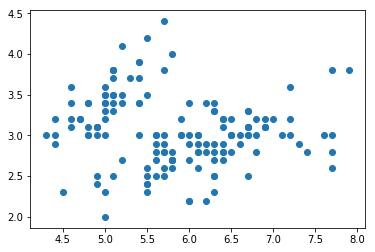

In [32]:
import numpy as np
import matplotlib.pyplot as plt
plt.scatter(data['sepal_length'],data['sepal_width'])
plt.show()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  


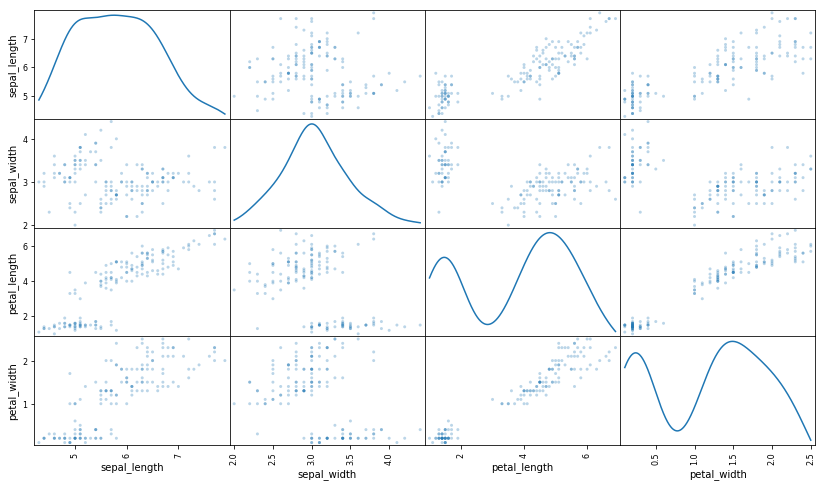

In [33]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

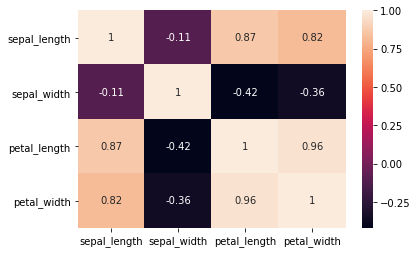

In [34]:
import seaborn as sns
sns.heatmap(data.corr(), annot=True)

# <center>======================================<cent>

<h1><center> Outliers</center></h1>
<h3><center>( Outliers are value that are far from the central tendency. )</center></h3>


### Outliers might be caused by errors in collecting or processiong the data, or they might be correct but unsusual measeurements. 

### It is always a good ideas to check for outliers, and sometimes it is useful and appropriate to discard them. 

### Variance, Standard deviation, covariance, correlation can be very sensitive to outliers. 


# Box plot 
![image.png](attachment:image.png)

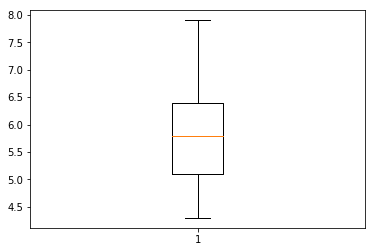

In [35]:
import matplotlib.pyplot as plt
plt.boxplot(data['sepal_length'])
plt.show()

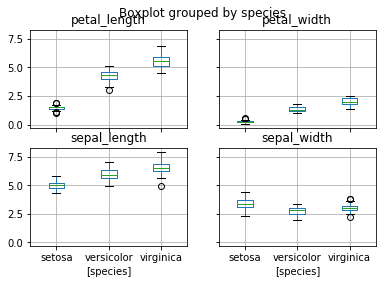

In [36]:
data.boxplot(by='species');

# Find Outliers 

In [37]:
outliers=[]

# For each feature find the data points with extreme high or low values
for feature in 'sepal_length', 'sepal_width', 'petal_length', 'petal_width':
    
    # Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(data[feature], 25.)
    
    # Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(data[feature], 75.)
    
    # Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3-Q1)*1.5
    print("Outlier step:", step)
    
    # Display the outliers
    print("Data points considered outliers for the feature '{}':".format(feature))
    feature_outliers= data[~((data[feature] >= Q1 - step) & (data[feature] <= Q3 + step))]
    display(feature_outliers) 
    outliers += feature_outliers.index.tolist()   

Outlier step: 1.950000000000001
Data points considered outliers for the feature 'sepal_length':


Empty DataFrame
Columns: [sepal_length, sepal_width, petal_length, petal_width, species]
Index: []

Outlier step: 0.75
Data points considered outliers for the feature 'sepal_width':


sepal_length  sepal_width  petal_length  petal_width     species
15           5.7          4.4           1.5          0.4      setosa
32           5.2          4.1           1.5          0.1      setosa
33           5.5          4.2           1.4          0.2      setosa
60           5.0          2.0           3.5          1.0  versicolor

Outlier step: 5.249999999999999
Data points considered outliers for the feature 'petal_length':


Empty DataFrame
Columns: [sepal_length, sepal_width, petal_length, petal_width, species]
Index: []

Outlier step: 2.25
Data points considered outliers for the feature 'petal_width':


Empty DataFrame
Columns: [sepal_length, sepal_width, petal_length, petal_width, species]
Index: []

In [38]:
# Remove the outliers, if any were specified
good_data = data.drop(data.index[outliers]).reset_index(drop = True) 
print("Number of outliers (inc duplicates): ", len(outliers))
print("New dataset with removed outliers has {} samples with {} features each.".format(*good_data.shape))

Number of outliers (inc duplicates):  4
New dataset with removed outliers has 146 samples with 5 features each.


# <center>======================================<cent>

<h1><center>Distribution of a variable<center></h1>

## Distribution - (of a variable) tells us what values the variable takes and how often it takes these values. 
## Exampe of Frequency Distribution: 
### Consider a data set of 26 children of ages 1-6 years. Then the frequency distribution of variable ‘age’ can be tabulated as follows: 
 - ### Frequency Distribution of Age
![image.png](attachment:image.png)

 - ### Bar diagram

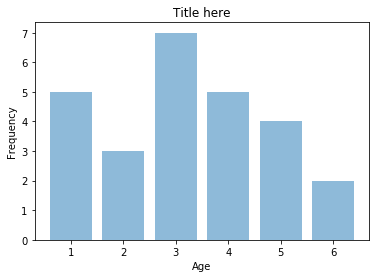

In [39]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
 
objects = ('1', '2', '3', '4', '5', '6')
y_pos = np.arange(len(objects))
x = [5,3,7,5,4,2]
plt.bar(y_pos, x, align='center', alpha=0.5)

plt.xticks(y_pos, objects)
plt.ylabel('Frequency')
plt.xlabel('Age')
plt.title('Title here')
 
plt.show()

# Histogram

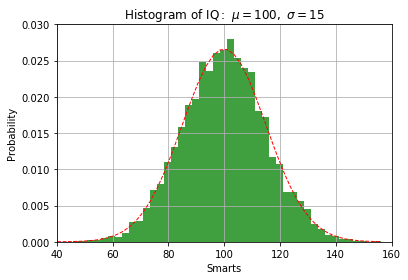

In [40]:
#!/usr/bin/env python
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

mu, sigma = 100, 15
x = mu + sigma*np.random.randn(10000)

# the histogram of the data
n, bins, patches = plt.hist(x, 50, normed=1, facecolor='green', alpha=0.75)

# add a 'best fit' line
y = mlab.normpdf( bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=1)

plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title(r'$\mathrm{Histogram\ of\ IQ:}\ \mu=100,\ \sigma=15$')
plt.axis([40, 160, 0, 0.03])
plt.grid(True)

plt.show()

Text(0.5,1,'Distributionb of Sepal Lengths')

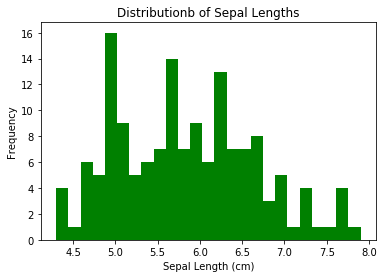

In [41]:
plt.hist(data['sepal_length'],bins=25, facecolor='green')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Frequency')
plt.title('Distributionb of Sepal Lengths')

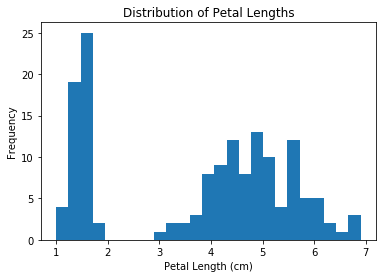

In [42]:
# Alternatively using Pandas plotting functionality
ax = data.petal_length.plot.hist(bins=25)

ax.set(xlabel='Petal Length (cm)', 
       ylabel='Frequency',
       title='Distribution of Petal Lengths');

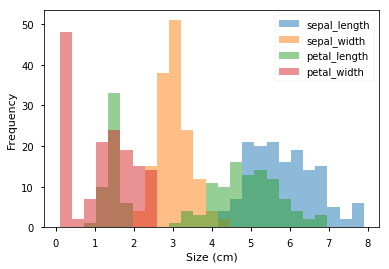

In [43]:
import seaborn as sns
sns.set_context('notebook')

# This uses the `.plot.hist` method
ax = data.plot.hist(bins=25, alpha=0.5)
ax.set_xlabel('Size (cm)');

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1a9fdcc0>,
      dtype=object)

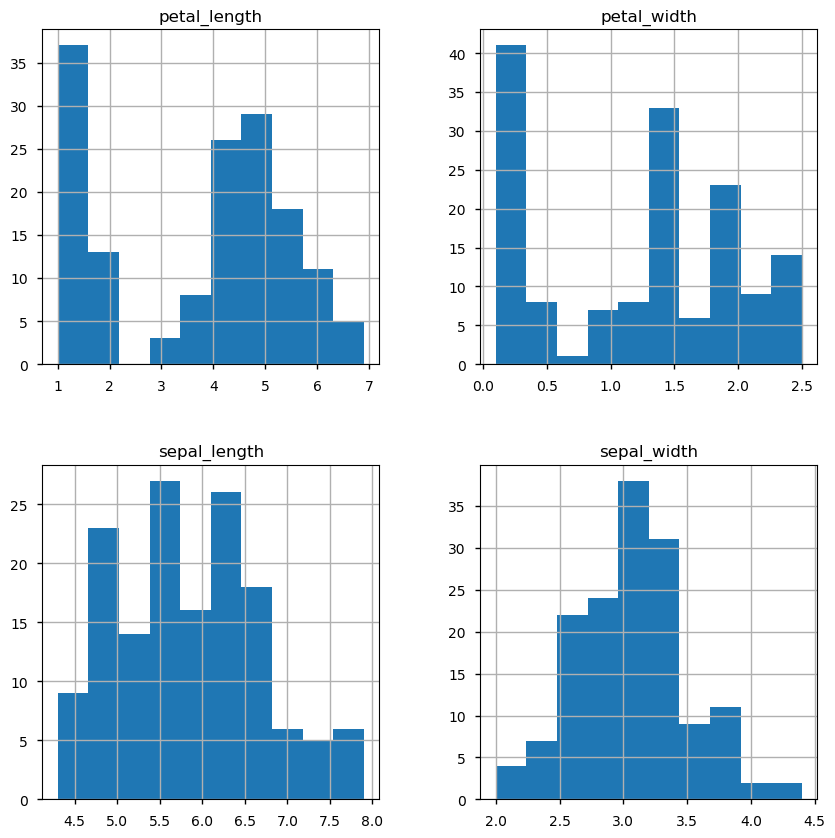

In [50]:
data.hist(
    column=["sepal_length", "sepal_width", "petal_length", "petal_width", "species"],
    figsize=(10, 10)
    #,sharey=True, sharex=True
)

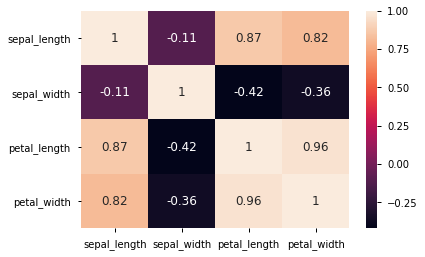

In [44]:
import seaborn as sns
sns.heatmap(data.corr(), annot=True)

# Hypothesis testing 


## Pearson correlation test: 
### test association between two quantivte variables. The test calculates a Pearson correlation coefficient and the 𝑝-value for testing non-correlation.
### The p-value is the probability of seeing a t-statistic at least that far from 0 if the null hypothesis were true.


In [45]:
import numpy as np
import scipy.stats as ss
c, p = ss.pearsonr(data['sepal_length'],data['sepal_length'])
print("Correlation:", c)
print("p-value for non-correlation:", p)

Correlation: 1.0
p-value for non-correlation: 0.0


In [46]:
# Problem: H: data['sepal_length'],data['sepal_width'] are independent
#H_0: X and Y are dependent 

p=0.1

c, pval = ss.pearsonr(data['sepal_length'],data['sepal_width'])
print("Correlation:", c)
print("p-value for non-correlation:", pval)

if p<pval:
    print("Accept H")
else:
    print("Reject H")

Correlation: -0.10936924995064935
p-value for non-correlation: 0.1827652152713665
Accept H


## One sample t-test (quantitative ~ constant)
### The one-sample 𝑡-test is used to determine whether a sample comes from a population with a specific mean.
### 1. Model the data 
####  Assume $x\sim \mathcal N(\mu,\sigma)$
### 2. Fit: estimate the model paramenters
#### $\bar x$ and $s$ are the estimators of $\mu$ and $\sigma$.
### 3. t-Test. 
$$t=\frac{\bar x-\mu_0}{\frac{s}{\sqrt{n}}}$$


In [48]:
import statistics as sta
import math
z=data['sepal_length']
print(np.mean(z))
t=(np.mean(z)-5.5)*math.sqrt(len(z))/sta.stdev(z)
print(t)

5.843333333333335
5.078045399642548


In [49]:
ss.ttest_1samp(data['sepal_length'],5.8)

Ttest_1sampResult(statistic=0.6409183514112012, pvalue=0.5225602746220779)

# Two sample (Student) t-test: compare two means

## The two-sample 𝑡-test is used to determine if two population means are equal.

## 1. Model of the date: Assume $x\sim \mathcal N(\mu_x,\sigma_x)$ and $y\sim \mathcal N(\mu_y,\sigma_y)$
## 2. Fit: estimate the model parameters: $\bar x,s_x, \bar y, s_y$
## 3. t-test
$$t=\frac{\bar x-\bar y}{s.\sqrt{\frac{1}{n_x}+\frac{1}{n_y}}}$$
where 
$$s=\sqrt{\frac{s_x^2(n_x-1)+s_y^2(n_y-1)}{n_x+n_y-2}}$$

In [50]:
ss.ttest_ind(data['sepal_length'],data['sepal_length'])

Ttest_indResult(statistic=0.0, pvalue=1.0)

In [53]:
x=data[data['species']=='virginica'].drop(['species'], axis=1)
x.head()

sepal_length  sepal_width  petal_length  petal_width
100           6.3          3.3           6.0          2.5
101           5.8          2.7           5.1          1.9
102           7.1          3.0           5.9          2.1
103           6.3          2.9           5.6          1.8
104           6.5          3.0           5.8          2.2

In [54]:
display(x.describe())

sepal_length  sepal_width  petal_length  petal_width
count      50.00000    50.000000     50.000000     50.00000
mean        6.58800     2.974000      5.552000      2.02600
std         0.63588     0.322497      0.551895      0.27465
min         4.90000     2.200000      4.500000      1.40000
25%         6.22500     2.800000      5.100000      1.80000
50%         6.50000     3.000000      5.550000      2.00000
75%         6.90000     3.175000      5.875000      2.30000
max         7.90000     3.800000      6.900000      2.50000

In [55]:
y=data[data['species']=='setosa'].drop(['species'], axis=1)
y.head()

sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2

In [56]:
display(y.describe())

sepal_length  sepal_width  petal_length  petal_width
count      50.00000    50.000000     50.000000     50.00000
mean        5.00600     3.418000      1.464000      0.24400
std         0.35249     0.381024      0.173511      0.10721
min         4.30000     2.300000      1.000000      0.10000
25%         4.80000     3.125000      1.400000      0.20000
50%         5.00000     3.400000      1.500000      0.20000
75%         5.20000     3.675000      1.575000      0.30000
max         5.80000     4.400000      1.900000      0.60000

In [57]:
z=data[data['species']=='versicolor'].drop(['species'], axis=1)
z.head()

sepal_length  sepal_width  petal_length  petal_width
50           7.0          3.2           4.7          1.4
51           6.4          3.2           4.5          1.5
52           6.9          3.1           4.9          1.5
53           5.5          2.3           4.0          1.3
54           6.5          2.8           4.6          1.5

In [58]:
display(z.describe())

sepal_length  sepal_width  petal_length  petal_width
count     50.000000    50.000000     50.000000    50.000000
mean       5.936000     2.770000      4.260000     1.326000
std        0.516171     0.313798      0.469911     0.197753
min        4.900000     2.000000      3.000000     1.000000
25%        5.600000     2.525000      4.000000     1.200000
50%        5.900000     2.800000      4.350000     1.300000
75%        6.300000     3.000000      4.600000     1.500000
max        7.000000     3.400000      5.100000     1.800000

In [59]:
ss.ttest_ind(x['sepal_length'],x['sepal_length'])

Ttest_indResult(statistic=0.0, pvalue=1.0)

In [60]:
ss.ttest_ind(x['sepal_length'],y['sepal_length'])

Ttest_indResult(statistic=15.386195820079404, pvalue=6.892546060674059e-28)

In [61]:
ss.ttest_ind(x['sepal_length'],z['sepal_length'])

Ttest_indResult(statistic=5.629165259719801, pvalue=1.7248563024547942e-07)

# ANOVA

In [62]:
ss.f_oneway(x['sepal_length'],y['sepal_length'],z['sepal_length'])

F_onewayResult(statistic=119.26450218450468, pvalue=1.6696691907693826e-31)

In [63]:
from sklearn.model_selection import train_test_split
A ,B = train_test_split(data,test_size=0.5)

In [64]:
import scipy.stats as ss
ss.ttest_ind(A['sepal_length'],B['sepal_length'])

Ttest_indResult(statistic=1.5957217906367358, pvalue=0.11268406632237733)

In [66]:
C,D= train_test_split(A,test_size=0.5)

In [67]:
ss.f_oneway(B['sepal_length'],C['sepal_length'],D['sepal_length'])

F_onewayResult(statistic=1.4358604049985253, pvalue=0.24122738309096198)